## Mehrdad Baradaran (99222020)
### Machine Learnin

# Goal

#### implement a regression model using the Scikit-Learn package to predict the popularity of new
#### articles on News Popularity Prediction dataset

# Import needed Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset

In [2]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data.keys()

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

# Check for missing values

In [3]:
print("Missing values:", data.isnull().sum().sum())

Missing values: 0


# Summary statistics

In [4]:
print(data.describe())

          timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000      

# Visualizations

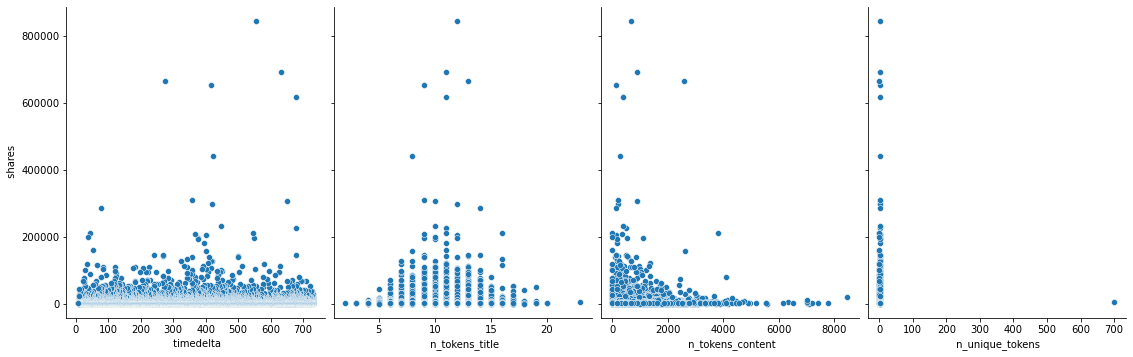

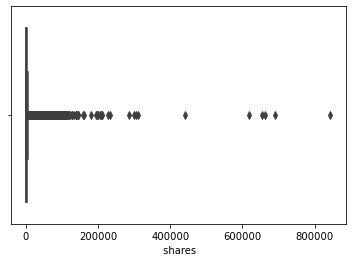

In [5]:
sns.pairplot(data, x_vars=[' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens'],
             y_vars=[" shares"], height=5, aspect=0.8)
plt.show()

sns.boxplot(x=data[" shares"])
plt.show()

# Feature engineering

In [6]:
data[" n_tokens_title_squared"] = data[" n_tokens_title"] ** 2
data[" n_tokens_content_squared"] = data[" n_tokens_content"] ** 2
data[" n_unique_tokens_squared"] = data[" n_unique_tokens"] ** 2


# Correlation analysis

In [7]:
corr_matrix = data.corr()
corr_shares = corr_matrix[" shares"].sort_values(ascending=False)
print(corr_shares)

 shares                        1.000000
 kw_avg_avg                    0.110413
 LDA_03                        0.083771
 kw_max_avg                    0.064306
 self_reference_avg_sharess    0.057789
                                 ...   
 max_negative_polarity        -0.019300
 average_token_length         -0.022007
 avg_negative_polarity        -0.032029
 data_channel_is_world        -0.049497
 LDA_02                       -0.059163
Name:  shares, Length: 63, dtype: float64


# Outlier detection

In [8]:
Q1 = data[" shares"].quantile(0.25)
Q3 = data[" shares"].quantile(0.75)
IQR = Q3 - Q1
print("Number of outliers:", len(data[(data[' shares'] < Q1 - 1.5 * IQR) | (data[' shares'] > Q3 + 1.5 * IQR)]))


Number of outliers: 4541


# Dimensionality reduction

In [9]:
from sklearn.decomposition import PCA

In [10]:
numeric_data = data.select_dtypes(include=np.number)

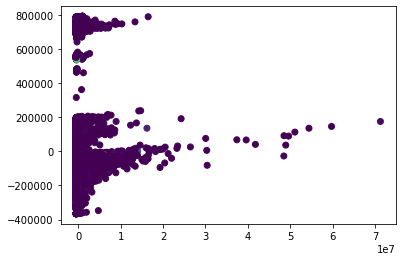

In [11]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(numeric_data.drop(" shares", axis=1))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=numeric_data[" shares"])
plt.show()

# Preprocess the data

In [12]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the model on the testing set

In [14]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 0.00014243059509448376


# Plotting

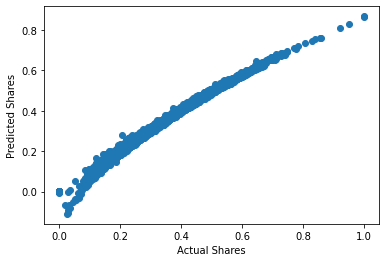

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.show()

# Hypothesis Test 1

In [16]:
short_title_shares = data[data[' n_tokens_title'] < 10][' shares']
long_title_shares = data[data[' n_tokens_title'] >= 10][' shares']
t, p = stats.ttest_ind(short_title_shares, long_title_shares)
print("Hypothesis Test 1: Short Title vs Long Title Shares")
print("t-value: %.3f, p-value: %.3f" % (t, p))


Hypothesis Test 1: Short Title vs Long Title Shares
t-value: -0.660, p-value: 0.509


# Hypothesis Test 2

In [17]:
positive_shares = data[data[' global_sentiment_polarity']>0][' shares']
negative_shares = data[data[' global_sentiment_polarity']<0][' shares']

t_stat, p_val = stats.ttest_ind(positive_shares, negative_shares, equal_var=False)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_val}")

t-statistic: -0.8162656022652125
p-value: 0.41439553548202757



# Hypothesis Test 3

In [18]:
image_shares = data[data[' num_imgs'] > 0][' shares']
no_image_shares = data[data[' num_imgs'] == 0][' shares']
t, p = stats.ttest_ind(image_shares, no_image_shares)
print("Hypothesis Test 3: Image vs No Image Shares")
print("t-value: %.3f, p-value: %.3f" % (t, p))

Hypothesis Test 3: Image vs No Image Shares
t-value: -7.930, p-value: 0.000


# Hypothesis Test 4

In [19]:
corr, p_value = pearsonr(data[" n_tokens_title"], data[" shares"])
print("Correlation between article title length and number of shares:", corr)
if p_value < 0.05:
    print("Null hypothesis rejected. The length of the article title has a significant effect on the number of shares.")
else:
    print("Null hypothesis cannot be rejected. The length of the article title does not have a significant effect on the number of shares.")


Correlation between article title length and number of shares: 0.008783118841819015
Null hypothesis cannot be rejected. The length of the article title does not have a significant effect on the number of shares.


# Perform Ridge regression

In [20]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("Ridge regression MSE:", mean_squared_error(y_test, y_pred))

Ridge regression MSE: 51.61287452130276


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.48048e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


# Perform Lasso regression


In [30]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Lasso regression MSE:", mean_squared_error(y_test, y_pred))

Lasso regression MSE: 1090.805960341564


# Create a dictionary of scaling methods

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

In [31]:
scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler(),
    'maxabs': MaxAbsScaler()
}

# Loop through each scaling method and fit the ridge_model
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    ridge = Ridge(alpha=1)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{scaler_name} scaling - MSE: {mse:.8f}")



standard scaling - MSE: 78.44440245
minmax scaling - MSE: 6668.80037760
robust scaling - MSE: 53.18462633
maxabs scaling - MSE: 6668.73916478


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37854e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [32]:
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{scaler_name} scaling - MSE: {mse:.8f}")

standard scaling - MSE: 1090.91076801


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37821757.63292484, tolerance: 24146703.494089007
  model = cd_fast.enet_coordinate_descent(


minmax scaling - MSE: 1123.47598740
robust scaling - MSE: 1089.47612110
maxabs scaling - MSE: 1123.28136278


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37816748.0514465, tolerance: 24146703.494089007
  model = cd_fast.enet_coordinate_descent(


# Create PolynomialFeatures object

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [35]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


# Create a Linear Regression model and fit the data

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

# Make predictions and Evaluate the model

In [37]:
y_pred = lin_reg.predict(X_test)

print('R-squared:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

R-squared: 0.9658753424811731
MSE: 0.0005358043411401115
